In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
data = pd.read_csv("data/telescope.csv")
X = data.drop(columns="class")
y = data["class"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [4]:
ss=StandardScaler().set_output(transform="pandas").fit(X_train)

In [6]:
cross_val_score(
    SVC(), 
    ss.transform(X_train), y_train, 
    scoring="matthews_corrcoef", 
    cv=5,
    n_jobs=-1
).mean()

0.707232339197804

In [7]:
svm=SVC()
feat_selector = SequentialFeatureSelector(
    svm, 
    n_features_to_select=1, 
    scoring="matthews_corrcoef",
    direction="backward",
    n_jobs=-1
)

In [8]:
feat_selector.fit(
    ss.transform(X_train), 
    y_train
)

SequentialFeatureSelector(direction='backward', estimator=SVC(),
                          n_features_to_select=1, n_jobs=-1,
                          scoring='matthews_corrcoef')

In [9]:
feat_selector.get_feature_names_out()

array(['fAlpha'], dtype=object)

In [11]:
columns = feat_selector.get_feature_names_out()
scaler = StandardScaler().fit(
    X_train[columns]
)

svm = SVC().fit(
    scaler.transform(X_train[columns]), y_train
)

svm.score(scaler.transform(X_train[columns]), y_train)

0.7376445846477392

In [12]:
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay, confusion_matrix

In [13]:
matthews_corrcoef(
    svm.predict(
        scaler.transform(X_train[columns])
    ), y_train
)

0.4154277266672054

In [14]:
preds = svm.predict(
    scaler.transform(X_test[columns])
)

In [15]:
svm.score(scaler.transform(X_test[columns]), y_test)

0.7323869610935857

In [16]:
matthews_corrcoef(preds, y_test)

0.4073928555410368

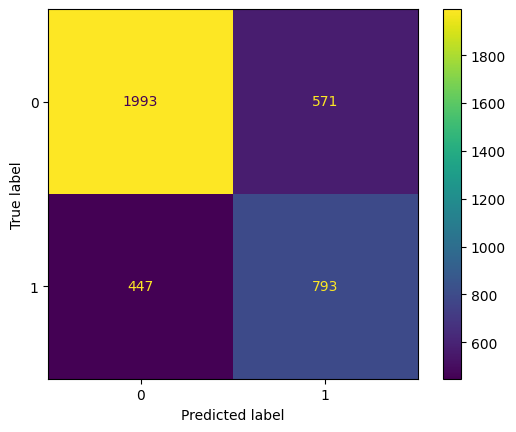

In [17]:
ConfusionMatrixDisplay(
    confusion_matrix(preds, y_test)
).plot()